In [ ]:
#@title 


%%HTML
<div style="text-align:center; display:flex; justify-content:space-between;">
<div style="background-color:white; width:25%; height:150px; display: flex;">

<img src="https://giecaruff.github.io/sites/gss_semana_2020/logos/GSS_semana_geofisica.png" height="40%">

</div>
<div style="background-color:white; width:50%; height:150px; text-align:center;">

<br><br>

<span style="color:purple; font-size: 16pt;">Minicurso Python para Geofísicos <br></span>
<span style="color:purple; font-size: 25pt;font-weight: bold;"> Cálculos petrofísicos </span>

</div>

<div style="background-color:white; width:25%; height:150px; text-align:right">
<img src="https://giecaruff.github.io/sites/gss_semana_2020/logos/logo_colorida_icone.png" height="60%">
</div>
</div>

<div style="background-color:white">
<center> <span style="color:purple; font-size: 25pt;font-weight: bold;center">Equipe:</span>
<br><br>

<div style="background-color:white;width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Fernando Vizeu</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/vizeu.jfif" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">fvizeus@gmail.com</span> </div>
<div style="background-color:white;width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Mário Martins</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/mario_machine.png" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">mario_martins@id.uff.br</span> </div>
<div style="background-color:white;width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Rodrigo Mota</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/rodrigo_dutra.jfif" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">dutrarodrigo@id.uff.br</span> </div>
<div style="background-color:white;width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Rodrigo Bijani</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/rodrigo_bijani.jfif" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">rodrigobijani@id.uff.br</span> </div>

</div>

## Introdução

Ao longo de um workflow para a avaliação de dados de poços, é comum etapas de cálculos petrofísicos. Nessa atividade, além de ler um arquivo LAS, vamos realizar alguns desses cálculos.

- Leitura do dado
- Visualização dos perfis
- Cálculo do volume de argila
- Cálculo da porosidade
- Visualização final dos perfis
- Salvar os perfis calculados



In [1]:
# Importando a biblioteca Matplotlib
import matplotlib.pyplot as plt
# Importando a biblioteca Numpy
import numpy as np

## Leitura do dado

Para ler os dados do  arquivo LAS necessários durante essa atividade, vamos utilizar a biblioteca lasio do python. A lasio é uma biblioteca de código livre desenvolvida para ler e escrever arquivos de acordo com o formato LAS (Log ASCII Standard).

O código fonte pode ser encontrado na página do GitHub: [codigo-fonte-lasio](https://github.com/kinverarity1/lasio). 
Para saber mais sobre a biblioteca, a documentação está disponível em: [documentacao-lasio](https://lasio.readthedocs.io/en/latest/).

In [2]:
# Instalando a biblioteca lasio
!pip install lasio

In [3]:
# Importanto a biblioteca lasio
import lasio

In [4]:
# criando um diretório local denominado "dados"
!mkdir -p dados
# importando o arquivo "dp1.las" dentro do diretório "dados" criado
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1eeYzMhECJvD-33wGjbfyqRLsxTt29cKy' -O dados/dp1.las

--2020-09-10 12:11:00--  https://docs.google.com/uc?export=download&id=1eeYzMhECJvD-33wGjbfyqRLsxTt29cKy
Resolving docs.google.com (docs.google.com)... 74.125.20.138, 74.125.20.139, 74.125.20.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.20.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-9g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5j364g3g9qne0jvn3p85l4euou6e8of0/1599739800000/08833350476852292073/*/1eeYzMhECJvD-33wGjbfyqRLsxTt29cKy?e=download [following]
--2020-09-10 12:11:01--  https://doc-0s-9g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5j364g3g9qne0jvn3p85l4euou6e8of0/1599739800000/08833350476852292073/*/1eeYzMhECJvD-33wGjbfyqRLsxTt29cKy?e=download
Resolving doc-0s-9g-docs.googleusercontent.com (doc-0s-9g-docs.googleusercontent.com)... 74.125.28.132, 2607:f8b0:400e:c04::84
Connecting to doc-0s-9g-docs.googleusercontent.com (doc-0s-9g-docs.g

Você deve ver algo assim:

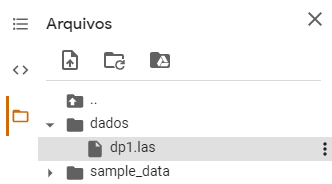

In [6]:
# Lendo o arquivo LAS
well = lasio.read('dados/dp1.las')
print(well)

## Visualização dos perfis

Primeiro, vamos plotar os perfis básicos para ter uma análise prévia do dado. Para isso, é necessário saber como consultar as curvas presentes no arquivo LAS lido.


Após a leitura do arquivo LAS com a função "read" da biblioteca lasio, é possível consultar o conteúdo do arquivo lido com a função "sections". O que retorna dessa última função é um dicionário. Sendo assim, é possível consultar cada seção padrão do arquivo LAS individualmente, da forma como se consulta os valores de cada chave em um dicionário, de acordo como foi aprendido na aula anterior.

In [12]:
# Conteúdo do arquivo LAS
print(well.sections)
# Ou apenas as chaves do dicionário gerado
print(well.sections.keys())
# Conteúdo de uma seção
print(well.sections['Well'])

{'Version': [HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS LOG ASCII STAN...), HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="ONE LINE PER DEPTH S...)], 'Well': [HeaderItem(mnemonic="STRT", unit="F", value="100.0", descr="START DEPTH"), HeaderItem(mnemonic="STOP", unit="F", value="7938.0", descr="STOP DEPTH"), HeaderItem(mnemonic="STEP", unit="F", value="0.5", descr="STEP VALUE"), HeaderItem(mnemonic="NULL", unit="", value="-999.0", descr="NULL VALUE"), HeaderItem(mnemonic="COMP", unit="", value="", descr="COMPANY"), HeaderItem(mnemonic="WELL", unit="", value="DREW POINT #1", descr="WELL"), HeaderItem(mnemonic="FLD", unit="", value="WILDCAT", descr="FIELD"), HeaderItem(mnemonic="LOC", unit="", value="26  18N   8W", descr="LOCATION"), HeaderItem(mnemonic="CNTY", unit="", value="NORTH SLOPE", descr="COUNTY"), HeaderItem(mnemonic="STAT", unit="", value="ALASKA", descr="STATE"), HeaderItem(mnemonic="CTRY", unit="", value="USA", descr="COUNTRY"), HeaderItem(mnemonic

### Formato LAS

O arquivo utilizado nessa atividade pertece ao formato LAS 2.0, criado por Canadian Well Logging Society. Por padrão o conteúdo do arquivo com o formato LAS 2.0 é dividido em seções: 

| Seções | Nome | 
|----------|------|
| ~V |  Version *| 
| ~W |  Well *|
| ~C | Curve *|
| ~P    | Parameter |
| ~O | Other |
| ~A     | ASCII Log Data *|

Para saber mais sobre o formato LAS 2.0: [LAS2.0-documentacao](http://www.cwls.org/wp-content/uploads/2017/02/Las2_Update_Feb2017.pdf)

### Conteúdo de uma seção na biblioteca lasio

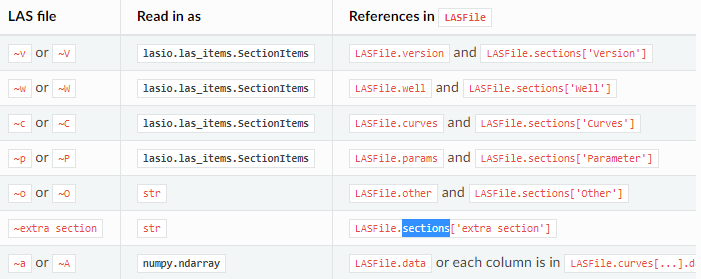

In [13]:
# Visualizando o conteúdo de cada seção padrão do arquivo LAS
print(well.version)
print(well.well)
print(well.curves)
print(well.data)

Mnemonic  Unit  Value  Description                             
--------  ----  -----  -----------                             
VERS            2.0    CWLS LOG ASCII STANDARD - VERSION 2.00  
WRAP            NO     ONE LINE PER DEPTH STEP                 
Mnemonic  Unit  Value             Description             
--------  ----  -----             -----------             
STRT      F     100.0             START DEPTH             
STOP      F     7938.0            STOP DEPTH              
STEP      F     0.5               STEP VALUE              
NULL            -999.0            NULL VALUE              
COMP                              COMPANY                 
WELL            DREW POINT #1     WELL                    
FLD             WILDCAT           FIELD                   
LOC             26  18N   8W      LOCATION                
CNTY            NORTH SLOPE       COUNTY                  
STAT            ALASKA            STATE                   
CTRY            USA               CO

Agora que temos uma ideia de como o arquivo lido é apresentado, podemos acessar as informações das curvas presentes por meio dos mnemonicos.

In [14]:
# Acessando itens de uma seção
print(well.curves.DEPT)
print(well.curves.DEPT.unit)
print(well.curves.DEPT.data)

CurveItem(mnemonic="DEPT", unit="F", value="", descr="1  DEPTH", original_mnemonic="DEPT", data.shape=(15693,))
F
[ 100.   100.5  101.  ... 7945.  7945.5 7946. ]


In [18]:
print(well.version.VERS.value)

2.0


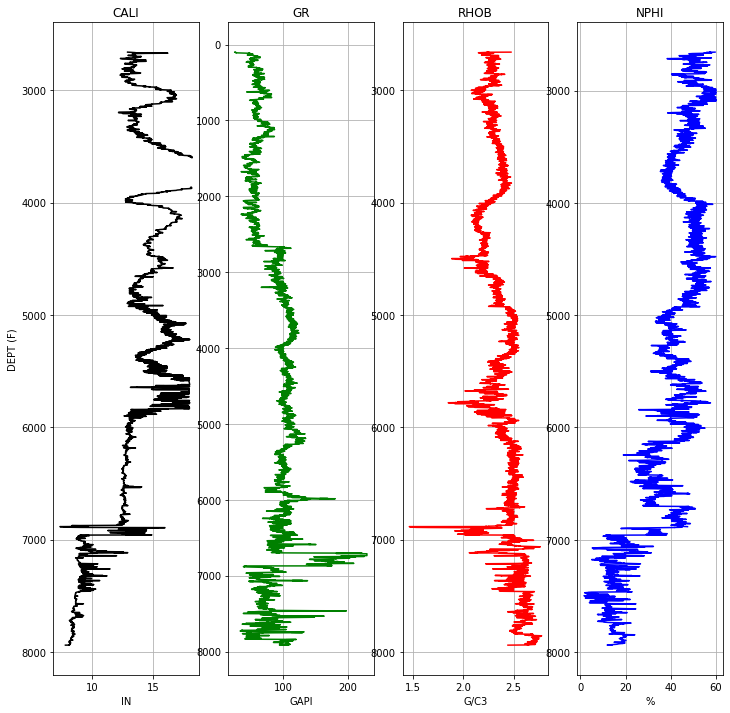

In [19]:
# Visualizando as curvas presentes no poço DP1
fig, ax = plt.subplots(1, 4)
fig.set_size_inches(12, 12)

ax[0].plot(well.curves.CALI.data, well.curves.DEPT.data, color='black')
ax[0].set_title(well.curves.CALI.mnemonic)
ax[0].set_xlabel(well.curves.CALI.unit)
ax[0].set_ylabel(well.curves.DEPT.mnemonic + ' (' + well.curves.DEPT.unit + ')')
ax[0].invert_yaxis()
ax[0].grid()
ax[1].plot(well.curves.GR.data, well.curves.DEPT.data, color='green')
ax[1].set_title(well.curves.GR.mnemonic)
ax[1].set_xlabel(well.curves.GR.unit)
ax[1].invert_yaxis()
ax[1].grid()
ax[2].plot(well.curves.RHOB.data, well.curves.DEPT.data, color='red')
ax[2].set_title(well.curves.RHOB.mnemonic)
ax[2].set_xlabel(well.curves.RHOB.unit)
ax[2].invert_yaxis()
ax[2].grid()
ax[3].plot(well.curves.NPHI.data, well.curves.DEPT.data, color='blue')
ax[3].set_title(well.curves.NPHI.mnemonic)
ax[3].set_xlabel(well.curves.NPHI.unit)
ax[3].invert_yaxis()
ax[3].grid()

In [20]:
# Criando uma função para o plot de curvas
def plot_curves(well, depth, curves, colors, size = (12,12)):
    
    n_tracks = len(curves)

    fig, ax = plt.subplots(1, n_tracks, sharey=True)
    fig.set_size_inches(size)

    ax[0].set_ylabel(well.curves[depth].mnemonic + ' (' + well.curves[depth].unit + ')')
    ax[0].invert_yaxis()
    for i in range(n_tracks):
        ax[i].plot(well.curves[curves[i]].data, well.curves[depth].data, color=colors[i])
        ax[i].set_title(well.curves[curves[i]].mnemonic)
        ax[i].set_xlabel(well.curves[curves[i]].unit)
        ax[i].grid()

    plt.show()

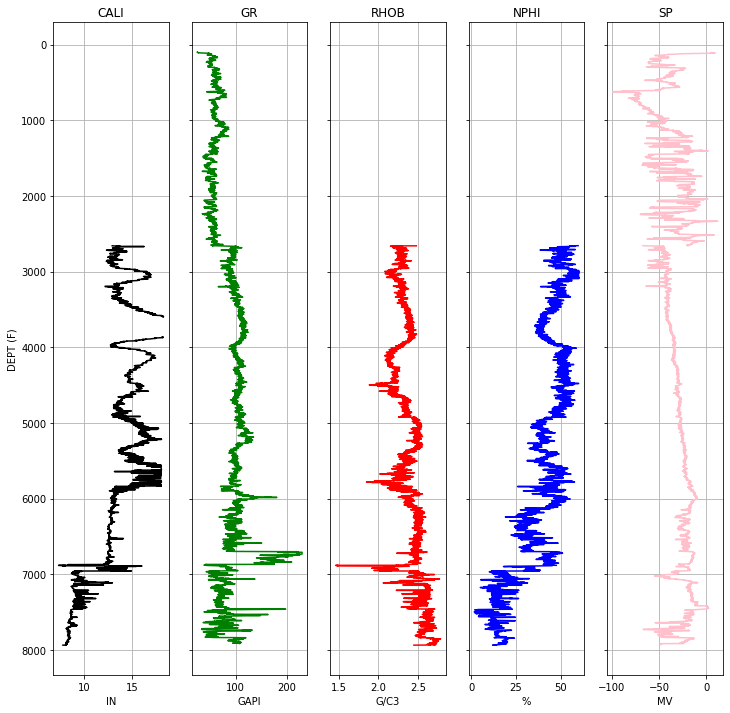

In [22]:
# Plotando as curvas por meio da função criada
curves = ['CALI', 'GR', 'RHOB', 'NPHI', 'SP']
colors = ['black','green', 'red', 'blue', 'pink']
plot_curves(well, 'DEPT', curves, colors)

# Volume de argila

A estimativa da argilosidade é fundamental para a avaliação petrofísica e interpretação dos dados de poços. Dentre as diversas formas de estimar a argilosidade, o cálculo do volume de argila a partir do perfil de raios gama (GR) por métodos, linear ou não-lineares, são os mais utilizados. Nessa atividade serão apresentados duas formas de realizar o cálculo do volume de argila, pelo método linear (IGR) e pelo método não-linear de Larionov.

## Linear

O volume de argila cálculado por meio do método linear é dado pela seguinte fórmula:

## $V_{SH-IGR_i} = \frac{GR_i - GR_{min}}{GR_{max} - GR_{min}}$

Onde, 

> - $GR_i$ é o valor do perfil GR a cada profundidade.
> - $GR_{min}$ é valor mínimo do perfil GR e indica o menor conteúdo de argila.
> - $GR_{max}$ é valor máximo do perfil GR e indica o maior conteúdo de argila.

In [ ]:
# Calculando o volume de argila pelo método linear
gr = well.curves.GR.data
vshale_igr = (gr - min(gr)) / (max(gr) - min(gr))
print(vshale_igr)

[0.00196993 0.         0.0011061  ...        nan        nan        nan]


Numa situação onde os cálculos seriam realizados para diversos poços, com diferentes perfis de raios gamma (GR), uma abordagem interessante seria de criar uma função para o cálculo do volume de argila apresentado anteriormente.

In [33]:
# Criando uma função para o cálculo de volume de argila IGR
def calculate_vshale_igr(gr):

    vshale_igr = (gr - min(gr)) / (max(gr) - min(gr))

    return vshale_igr

vshale_igr = calculate_vshale_igr(well.curves.GR.data)
print(vshale_igr)

[0.00196993 0.         0.0011061  ...        nan        nan        nan]


É comum o volume de argila não ser cálculado levando em consideração apenas um valor de GR mínimo e um valor de GR máximo e sim por meio de uma média de valores GR mínimos e uma média de valores GR máximos. Uma abordagem interessante é realizar o cálculo considerando intervalos diferentes no mesmo poço, por exemplo, intervalos de formações diferentes.

In [30]:
# Definindo alguns intervalos para o exemplo
top = [0.0, 2000.0, 4000.0]
bottom = [2000.0, 4000.0, 8000.0]

In [31]:
# Função para o cálculo do volume de argila por intervalos
def vshale_igr_interval(gr, depth, top, bottom):

    vshale = np.full(gr.shape[0], np.nan)
    for t, b in zip(top, bottom):
        w = (depth >= t) & (depth < b)
        vshale[w] = calculate_vshale_igr(gr[w])

    return vshale

In [34]:
# Calculando o volume de argila pelo método linear para os intervalos
vshale_igr_int = vshale_igr_interval(well.curves.GR.data, well.curves.DEPT.data, top, bottom)
print(vshale_igr_int)

[0.00651913 0.         0.00366046 ...        nan        nan        nan]


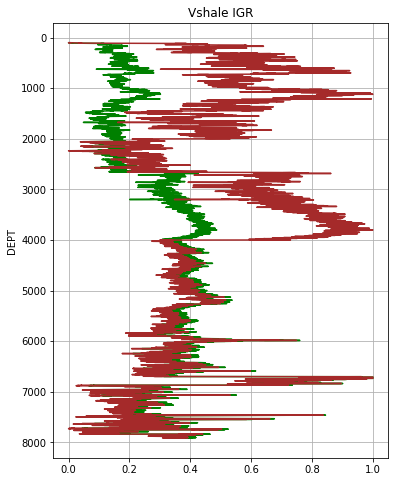

In [35]:
# Visualizando o perfil vshale_igr_int calculado
plt.figure(figsize=(6,8))
plt.plot(vshale_igr, well.curves.DEPT.data, color='green')
plt.plot(vshale_igr_int, well.curves.DEPT.data, color='brown')
plt.title('Vshale IGR')
plt.ylabel('DEPT')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

## Larionov

O método linear é o mais simples e tende a superestimar a argilosidade nos valores intermediários de volume de argila. Sendo assim, algumas correções são aplicadas a partir do volume IGR cálculado. O método de Larionov é um tipo de correção e pode ser dado pelas fórmulas a seguir, onde a primeira é referente as rochas recentes e a segunda as rochas mais antigas:

## (1) $V_{SH-Larionov_i} = 0.083 \times (2^{(3.7 \times V_{SH-IGR_i}) } - 1 )$

## (2) $V_{SH-Larionov_i} = 0.33 \times (2^{(2 \times V_{SH-IGR_i}) } - 1 )$

Onde, 

> - $V_{SH-IGR_i}$ é o valor do volume de argila calculado pelo método linear para cada profundidade.

In [36]:
# Calculando o volume de argila pelo método larionov
vshale_lari = 0.083 * ( 2 ** (3.7 * vshale_igr) - 1)
print(vshale_lari)

[0.00042039 0.         0.00023579 ...        nan        nan        nan]


In [37]:
# Criando uma função para o cálculo de volume de argila pelo método larionov
def calculate_vshale_lari(gr):

    vshale_igr = (gr - min(gr)) / (max(gr) - min(gr))

    vshale_lari = 0.083 * ( 2 ** (3.7 * vshale_igr) - 1)

    return vshale_lari

vshale_lari = calculate_vshale_lari(well.curves.GR.data)
print(vshale_lari)

[0.00042039 0.         0.00023579 ...        nan        nan        nan]


In [38]:
# Função para o cálculo do volume de argila por intervalos
def vshale_lari_interval(gr, depth, top, bottom):

    vshale = np.full(gr.shape[0], np.nan)
    for t, b in zip(top, bottom):
        w = (depth >= t) & (depth < b)
        vshale[w] = calculate_vshale_lari(gr[w])

    return vshale

In [40]:
# Definindo alguns intervalos e calculando o volume de argila pelo método larionov
# para esses intervalos
top = [0.0, 2000.0, 3000.0, 4000.0]
bottom = [2000.0, 3000.0, 4000.0, 8000.0]
vshale_lari_int = vshale_lari_interval(well.curves.GR.data, well.curves.DEPT.data, top, bottom)
print(vshale_lari_int)

[0.00139936 0.         0.00078285 ...        nan        nan        nan]


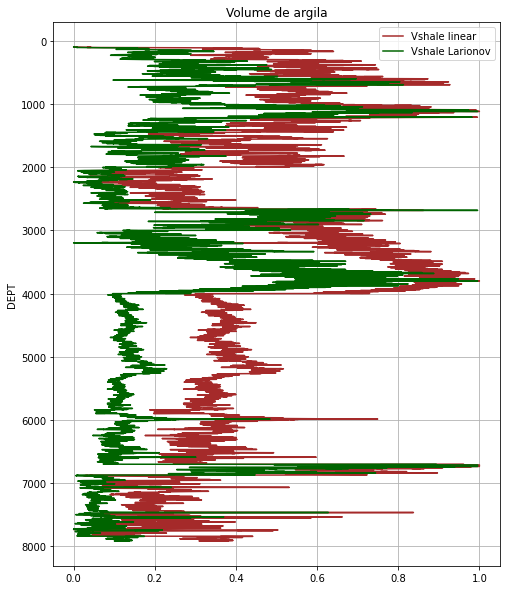

In [41]:
# Visualizando os perfils de volume de argila calculados
plt.figure(figsize=(8,10))
plt.plot(vshale_igr_int, well.curves.DEPT.data, color='brown', label='Vshale linear')
plt.plot(vshale_lari_int, well.curves.DEPT.data, color='darkgreen', label='Vshale Larionov')
plt.title('Volume de argila')
plt.ylabel('DEPT')
plt.gca().invert_yaxis()
plt.grid()
plt.legend()
plt.show()

# Porosidade

Para a estimativa da porosidade geralmente são utilizados os perfis de densidade (RHOB), neutrão (NPHI) ou o sônico (DT). Nessa atividade, vamos calcular a porosidade a partir do perfil de densidade. 

Para isso, é necessário realizar algumas suposições em relação as propriedades da litologia e o dos fluídos presentes. Nessa atividade, vamos assumir alguns valores propostos aleatóriamente, sem nenhum compromisso com a realidade da localização do poço.

## Densidade

O cálculo da porosidade requer o valor da densidade da matriz da rocha, o perfil de densidade (RHOB) e a densidade do fluído presente na profundidade de interesse. A equação para o cálculo é dado por:

## $\Phi_D = \frac{\varrho_m - \varrho_b}{\varrho_m - \varrho_{fl}}$

Onde, 

> - $\varrho_m$ é o valor da densidade da matriz da rocha.
> - $\varrho_b$ é valor do perfil de densidade (RHOB).
> - $\varrho_{fl}$ é valor da densidade do fluído.

In [42]:
# Criando a função para o cálculo da porosidade a partir do perfil de densidade
def calculate_porosity_den(rhob, rhom, rhofl):
    
    phi = (rhom - rhob) / (rhom - rhofl)
    return phi

É muito comum essas informações, como por exemplo, a densidade da matriz da rocha e a densidade do fluído, serem importadas de um arquivo externo. Aqui, vamos supor que essas informações e os intervalos de profundidade referentes as formações do poço sejam importados de um arquivo no formato csv.

In [43]:
# importando o arquivo "formacoes.csv" dentro do diretório "dados" criado
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1WzF0zO1HPPu0lKcLXF0MqR6Maghf9PP7' -O dados/formacoes.csv

--2020-09-10 12:59:40--  https://docs.google.com/uc?export=download&id=1WzF0zO1HPPu0lKcLXF0MqR6Maghf9PP7
Resolving docs.google.com (docs.google.com)... 74.125.142.100, 74.125.142.102, 74.125.142.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-9g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/24sd90q7vfp6jo3328rqg3rmn1vl7odk/1599742725000/08833350476852292073/*/1WzF0zO1HPPu0lKcLXF0MqR6Maghf9PP7?e=download [following]
--2020-09-10 12:59:40--  https://doc-0g-9g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/24sd90q7vfp6jo3328rqg3rmn1vl7odk/1599742725000/08833350476852292073/*/1WzF0zO1HPPu0lKcLXF0MqR6Maghf9PP7?e=download
Resolving doc-0g-9g-docs.googleusercontent.com (doc-0g-9g-docs.googleusercontent.com)... 74.125.28.132, 2607:f8b0:400e:c04::84
Connecting to doc-0g-9g-docs.googleusercontent.com (doc-0g-9g-do

In [44]:
# Importando a biblioteca csv
import csv

In [45]:
# Lendo o arquivo "formacoes.csv"
formacoes = []
with open('dados/formacoes.csv', 'r') as f:
    arquivo = csv.reader(f, delimiter=',')
    for row in arquivo:
        formacao = {}
        formacao['nome'] = row[0]
        formacao['top'] = float(row[1])
        formacao['bottom'] = float(row[2])
        formacao['rhom'] = float(row[3])
        formacao['rhofl'] = float(row[4])
        formacoes.append(formacao)

print(formacoes)

[{'nome': 'FormacaoA', 'top': 0.0, 'bottom': 2000.0, 'rhom': 2.65, 'rhofl': 0.8}, {'nome': 'FormacaoB', 'top': 2000.0, 'bottom': 4000.0, 'rhom': 2.87, 'rhofl': 1.1}, {'nome': 'FormacaoC', 'top': 4000.0, 'bottom': 6000.0, 'rhom': 2.71, 'rhofl': 1.1}, {'nome': 'FormacaoD', 'top': 6000.0, 'bottom': 8000.0, 'rhom': 2.65, 'rhofl': 0.8}]


In [48]:
# Criando uma função para calcular a porosidade pelo perfil de densidade por intervalos
def calculate_porosity_den_int(depth, rhob, formacoes):
    
    phi = np.full(rhob.shape[0], np.nan)
    for f in formacoes:
        w = (depth >= f['top']) & (depth < f['bottom'])
        phi[w] = calculate_porosity_den(rhob[w], f['rhom'], f['rhofl'])

    return phi

In [49]:
# Calculando a porosidade de acordo com as informações do arquivo "formacoes.csv"
phi = calculate_porosity_den_int(well.curves.DEPT.data, well.curves.RHOB.data, formacoes)
print(phi)

[nan nan nan ... nan nan nan]


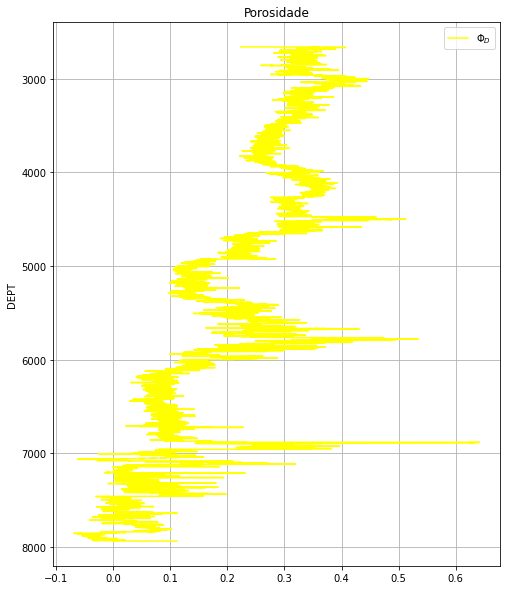

In [50]:
# Visualizando o perfil de porosidade calculado
plt.figure(figsize=(8,10))
plt.plot(phi, well.curves.DEPT.data, color='yellow', label='$\Phi_D$')
plt.title('Porosidade')
plt.ylabel('DEPT')
plt.gca().invert_yaxis()
plt.grid()
plt.legend()
plt.show()

# Visualização final dos perfis

Agora que temos alguns perfis calculados, vamos criar um plot onde que possamos visualizar os perfis importados pelo arquivo LAS e também os perfis calculados.

Para isso vamos usar a função que criamos lá no início da atividade:

```
def plot_curves(well, depth, curves, colors, size = (12,12)):
    
    n_tracks = len(curves)

    fig, ax = plt.subplots(1, n_tracks, sharey=True)
    fig.set_size_inches(size)

    ax[0].set_ylabel(well.curves[depth].mnemonic + ' (' + well.curves[depth].unit + ')')
    ax[0].invert_yaxis()
    for i in range(n_tracks):
        ax[i].plot(well.curves[curves[i]].data, well.curves[depth].data, color=colors[i])
        ax[i].set_title(well.curves[curves[i]].mnemonic)
        ax[i].set_xlabel(well.curves[curves[i]].unit)
        ax[i].grid()

    plt.show()
```

**OBS:** Vale lembrar que antes de usar a função para criar o plot com as curvas calculadas, precisamos adicionar essas curvas ao poço.



In [51]:
# Adicionando as curvas
well.append_curve('VSHALE_IGR', vshale_igr_int, unit='%', descr='Volume de argila calculado pelo metodo linear')
well.append_curve('VSHALE_LARI', vshale_lari_int, unit='%', descr='Volume de argila calculado pelo metodo larionov')
well.append_curve('PHI', phi, unit='%', descr='Porosidade calculada pelo perfil densidade')
print(well.curves)

Mnemonic     Unit  Value  Description                                      
--------     ----  -----  -----------                                      
DEPT         F            1  DEPTH                                         
SP           MV           2                                                
ILD          OHMM         3                                                
ILM          OHMM         4                                                
LL8          OHMM         5                                                
GR           GAPI         6                                                
CALI         IN           7                                                
DRHO         G/C3         8                                                
RHOB         G/C3         9                                                
NPHI         %            10                                               
DT           US/F         11                                               
VSHALE_IGR  

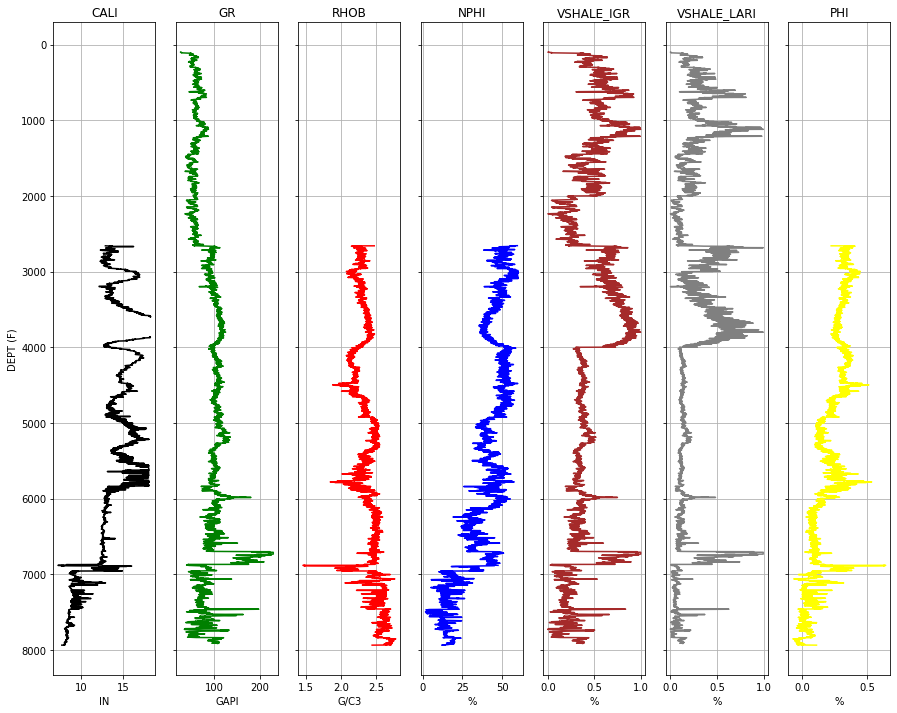

In [52]:
# Visualizando as curvas do arquivo LAS e também as curvas calculadas
curves = ['CALI', 'GR', 'RHOB', 'NPHI', 'VSHALE_IGR', 'VSHALE_LARI', 'PHI']
colors = ['black','green', 'red', 'blue', 'brown', 'gray', 'yellow']
plot_curves(well, 'DEPT', curves, colors, size=(15, 12))

# Salvando um arquivo LAS

Por fim, vamos gerar um arquivo LAS com as curvas que foram calculadas durante as atividades propostas nesse notebook. 

In [53]:
# Salvando o arquivo "dp1_calc.las" no diretório "dados"
well.write('dados/dp1_calc.las', version=2)